<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9565003	total: 67.8ms	remaining: 1m 7s
1:	learn: 0.9350875	total: 72.1ms	remaining: 36s
2:	learn: 0.9133232	total: 75.5ms	remaining: 25.1s
3:	learn: 0.8955702	total: 77.9ms	remaining: 19.4s
4:	learn: 0.8786066	total: 81.1ms	remaining: 16.1s
5:	learn: 0.8611628	total: 83.4ms	remaining: 13.8s
6:	learn: 0.8456110	total: 86ms	remaining: 12.2s
7:	learn: 0.8306118	total: 87.8ms	remaining: 10.9s
8:	learn: 0.8157598	total: 89.5ms	remaining: 9.85s
9:	learn: 0.7996693	total: 91.4ms	remaining: 9.04s
10:	learn: 0.7838194	total: 94.1ms	remaining: 8.46s
11:	learn: 0.7705039	total: 96.7ms	remaining: 7.96s
12:	learn: 0.7549618	total: 99.1ms	remaining: 7.53s
13:	learn: 0.7400857	total: 102ms	remaining: 7.16s
14:	learn: 0.7270017	total: 104ms	remaining: 6.84s
15:	learn: 0.7133780	total: 107ms	remaining: 6.56s
16:	learn: 0.7019019	total: 109ms	remaining: 6.32s
17:	learn: 0.6892825	total: 112ms	remaining: 6.09s
18:	learn: 0.6777922	total: 114ms	remaining: 5.88s
19:

47:	learn: 0.4472163	total: 177ms	remaining: 3.51s
48:	learn: 0.4414494	total: 179ms	remaining: 3.48s
49:	learn: 0.4367806	total: 182ms	remaining: 3.45s
50:	learn: 0.4311222	total: 184ms	remaining: 3.43s
51:	learn: 0.4255729	total: 186ms	remaining: 3.4s
52:	learn: 0.4206850	total: 189ms	remaining: 3.37s
53:	learn: 0.4173313	total: 191ms	remaining: 3.34s
54:	learn: 0.4128277	total: 193ms	remaining: 3.32s
55:	learn: 0.4095554	total: 196ms	remaining: 3.3s
56:	learn: 0.4054082	total: 198ms	remaining: 3.28s
57:	learn: 0.4012688	total: 200ms	remaining: 3.25s
58:	learn: 0.3982067	total: 202ms	remaining: 3.23s
59:	learn: 0.3935937	total: 205ms	remaining: 3.22s
60:	learn: 0.3892425	total: 207ms	remaining: 3.19s
61:	learn: 0.3859946	total: 209ms	remaining: 3.17s
62:	learn: 0.3833588	total: 211ms	remaining: 3.14s
63:	learn: 0.3800192	total: 213ms	remaining: 3.12s
64:	learn: 0.3776115	total: 215ms	remaining: 3.1s
65:	learn: 0.3746335	total: 217ms	remaining: 3.07s
66:	learn: 0.3712426	total: 219ms	

114:	learn: 0.2737944	total: 345ms	remaining: 2.65s
115:	learn: 0.2726417	total: 349ms	remaining: 2.66s
116:	learn: 0.2712834	total: 351ms	remaining: 2.65s
117:	learn: 0.2694984	total: 354ms	remaining: 2.64s
118:	learn: 0.2680751	total: 356ms	remaining: 2.64s
119:	learn: 0.2672586	total: 359ms	remaining: 2.63s
120:	learn: 0.2659905	total: 362ms	remaining: 2.63s
121:	learn: 0.2649900	total: 365ms	remaining: 2.62s
122:	learn: 0.2640561	total: 367ms	remaining: 2.62s
123:	learn: 0.2624123	total: 369ms	remaining: 2.61s
124:	learn: 0.2613761	total: 372ms	remaining: 2.6s
125:	learn: 0.2601099	total: 375ms	remaining: 2.6s
126:	learn: 0.2590075	total: 377ms	remaining: 2.59s
127:	learn: 0.2579589	total: 380ms	remaining: 2.59s
128:	learn: 0.2568463	total: 383ms	remaining: 2.58s
129:	learn: 0.2560289	total: 385ms	remaining: 2.58s
130:	learn: 0.2547782	total: 387ms	remaining: 2.57s
131:	learn: 0.2537642	total: 390ms	remaining: 2.56s
132:	learn: 0.2531158	total: 392ms	remaining: 2.55s
133:	learn: 0.

142:	learn: 0.2442100	total: 537ms	remaining: 3.22s
143:	learn: 0.2432654	total: 547ms	remaining: 3.25s
144:	learn: 0.2424582	total: 553ms	remaining: 3.26s
145:	learn: 0.2411830	total: 555ms	remaining: 3.25s
146:	learn: 0.2408012	total: 558ms	remaining: 3.24s
147:	learn: 0.2397317	total: 561ms	remaining: 3.23s
148:	learn: 0.2392311	total: 563ms	remaining: 3.22s
149:	learn: 0.2383794	total: 566ms	remaining: 3.21s
150:	learn: 0.2372811	total: 569ms	remaining: 3.2s
151:	learn: 0.2364783	total: 572ms	remaining: 3.19s
152:	learn: 0.2356496	total: 574ms	remaining: 3.18s
153:	learn: 0.2350904	total: 583ms	remaining: 3.21s
154:	learn: 0.2340345	total: 591ms	remaining: 3.22s
155:	learn: 0.2331920	total: 594ms	remaining: 3.21s
156:	learn: 0.2324834	total: 596ms	remaining: 3.2s
157:	learn: 0.2317697	total: 599ms	remaining: 3.19s
158:	learn: 0.2310205	total: 601ms	remaining: 3.18s
159:	learn: 0.2302817	total: 604ms	remaining: 3.17s
160:	learn: 0.2295778	total: 606ms	remaining: 3.16s
161:	learn: 0.

184:	learn: 0.2142674	total: 699ms	remaining: 3.08s
185:	learn: 0.2138306	total: 702ms	remaining: 3.07s
186:	learn: 0.2131722	total: 704ms	remaining: 3.06s
187:	learn: 0.2125445	total: 707ms	remaining: 3.05s
188:	learn: 0.2119020	total: 709ms	remaining: 3.04s
189:	learn: 0.2112560	total: 712ms	remaining: 3.03s
190:	learn: 0.2107482	total: 714ms	remaining: 3.02s
191:	learn: 0.2101443	total: 717ms	remaining: 3.02s
192:	learn: 0.2094717	total: 719ms	remaining: 3.01s
193:	learn: 0.2086646	total: 722ms	remaining: 3s
194:	learn: 0.2078743	total: 725ms	remaining: 2.99s
195:	learn: 0.2072685	total: 728ms	remaining: 2.99s
196:	learn: 0.2067210	total: 731ms	remaining: 2.98s
197:	learn: 0.2061138	total: 734ms	remaining: 2.97s
198:	learn: 0.2055410	total: 736ms	remaining: 2.96s
199:	learn: 0.2046938	total: 739ms	remaining: 2.95s
200:	learn: 0.2041061	total: 741ms	remaining: 2.94s
201:	learn: 0.2034450	total: 745ms	remaining: 2.94s
202:	learn: 0.2028384	total: 747ms	remaining: 2.93s
203:	learn: 0.2

239:	learn: 0.1845782	total: 880ms	remaining: 2.79s
240:	learn: 0.1843994	total: 883ms	remaining: 2.78s
241:	learn: 0.1836580	total: 885ms	remaining: 2.77s
242:	learn: 0.1830690	total: 888ms	remaining: 2.77s
243:	learn: 0.1825933	total: 891ms	remaining: 2.76s
244:	learn: 0.1819756	total: 894ms	remaining: 2.75s
245:	learn: 0.1816057	total: 897ms	remaining: 2.75s
246:	learn: 0.1812024	total: 899ms	remaining: 2.74s
247:	learn: 0.1806860	total: 902ms	remaining: 2.73s
248:	learn: 0.1804118	total: 904ms	remaining: 2.73s
249:	learn: 0.1799090	total: 906ms	remaining: 2.72s
250:	learn: 0.1797004	total: 909ms	remaining: 2.71s
251:	learn: 0.1789822	total: 911ms	remaining: 2.71s
252:	learn: 0.1788108	total: 914ms	remaining: 2.7s
253:	learn: 0.1785642	total: 916ms	remaining: 2.69s
254:	learn: 0.1778921	total: 919ms	remaining: 2.69s
255:	learn: 0.1774016	total: 921ms	remaining: 2.68s
256:	learn: 0.1770916	total: 924ms	remaining: 2.67s
257:	learn: 0.1765201	total: 927ms	remaining: 2.67s
258:	learn: 0

290:	learn: 0.1616003	total: 1.04s	remaining: 2.52s
291:	learn: 0.1611874	total: 1.04s	remaining: 2.52s
292:	learn: 0.1608939	total: 1.04s	remaining: 2.51s
293:	learn: 0.1603842	total: 1.04s	remaining: 2.51s
294:	learn: 0.1599135	total: 1.05s	remaining: 2.5s
295:	learn: 0.1595813	total: 1.05s	remaining: 2.5s
296:	learn: 0.1594136	total: 1.05s	remaining: 2.49s
297:	learn: 0.1592496	total: 1.05s	remaining: 2.48s
298:	learn: 0.1588141	total: 1.06s	remaining: 2.48s
299:	learn: 0.1585237	total: 1.06s	remaining: 2.47s
300:	learn: 0.1581690	total: 1.06s	remaining: 2.47s
301:	learn: 0.1576698	total: 1.07s	remaining: 2.46s
302:	learn: 0.1572486	total: 1.07s	remaining: 2.46s
303:	learn: 0.1568560	total: 1.07s	remaining: 2.46s
304:	learn: 0.1563857	total: 1.07s	remaining: 2.45s
305:	learn: 0.1558623	total: 1.08s	remaining: 2.44s
306:	learn: 0.1554713	total: 1.08s	remaining: 2.44s
307:	learn: 0.1549833	total: 1.08s	remaining: 2.43s
308:	learn: 0.1546519	total: 1.08s	remaining: 2.43s
309:	learn: 0.

347:	learn: 0.1439955	total: 1.21s	remaining: 2.26s
348:	learn: 0.1439370	total: 1.21s	remaining: 2.26s
349:	learn: 0.1438539	total: 1.21s	remaining: 2.25s
350:	learn: 0.1435953	total: 1.22s	remaining: 2.25s
351:	learn: 0.1435058	total: 1.22s	remaining: 2.24s
352:	learn: 0.1432304	total: 1.22s	remaining: 2.24s
353:	learn: 0.1431786	total: 1.22s	remaining: 2.23s
354:	learn: 0.1428784	total: 1.23s	remaining: 2.23s
355:	learn: 0.1428262	total: 1.24s	remaining: 2.24s
356:	learn: 0.1424970	total: 1.24s	remaining: 2.24s
357:	learn: 0.1422790	total: 1.25s	remaining: 2.23s
358:	learn: 0.1417747	total: 1.25s	remaining: 2.23s
359:	learn: 0.1414991	total: 1.25s	remaining: 2.22s
360:	learn: 0.1409797	total: 1.25s	remaining: 2.22s
361:	learn: 0.1406848	total: 1.26s	remaining: 2.21s
362:	learn: 0.1403928	total: 1.26s	remaining: 2.21s
363:	learn: 0.1402807	total: 1.26s	remaining: 2.2s
364:	learn: 0.1402309	total: 1.26s	remaining: 2.2s
365:	learn: 0.1401307	total: 1.27s	remaining: 2.19s
366:	learn: 0.

375:	learn: 0.1375997	total: 1.4s	remaining: 2.32s
376:	learn: 0.1375234	total: 1.4s	remaining: 2.31s
377:	learn: 0.1373834	total: 1.4s	remaining: 2.31s
378:	learn: 0.1371074	total: 1.41s	remaining: 2.3s
379:	learn: 0.1367680	total: 1.41s	remaining: 2.3s
380:	learn: 0.1365395	total: 1.41s	remaining: 2.29s
381:	learn: 0.1362142	total: 1.41s	remaining: 2.29s
382:	learn: 0.1359422	total: 1.42s	remaining: 2.28s
383:	learn: 0.1356915	total: 1.42s	remaining: 2.27s
384:	learn: 0.1353599	total: 1.43s	remaining: 2.28s
385:	learn: 0.1352991	total: 1.43s	remaining: 2.28s
386:	learn: 0.1352255	total: 1.43s	remaining: 2.27s
387:	learn: 0.1349488	total: 1.44s	remaining: 2.27s
388:	learn: 0.1347110	total: 1.44s	remaining: 2.27s
389:	learn: 0.1342972	total: 1.45s	remaining: 2.27s
390:	learn: 0.1340262	total: 1.45s	remaining: 2.26s
391:	learn: 0.1337277	total: 1.46s	remaining: 2.26s
392:	learn: 0.1335899	total: 1.46s	remaining: 2.25s
393:	learn: 0.1331222	total: 1.46s	remaining: 2.25s
394:	learn: 0.132

415:	learn: 0.1278983	total: 1.55s	remaining: 2.18s
416:	learn: 0.1278626	total: 1.55s	remaining: 2.17s
417:	learn: 0.1275875	total: 1.56s	remaining: 2.17s
418:	learn: 0.1274103	total: 1.56s	remaining: 2.16s
419:	learn: 0.1271002	total: 1.56s	remaining: 2.16s
420:	learn: 0.1267262	total: 1.56s	remaining: 2.15s
421:	learn: 0.1265218	total: 1.57s	remaining: 2.15s
422:	learn: 0.1262898	total: 1.57s	remaining: 2.14s
423:	learn: 0.1260475	total: 1.57s	remaining: 2.14s
424:	learn: 0.1259682	total: 1.57s	remaining: 2.13s
425:	learn: 0.1257387	total: 1.6s	remaining: 2.15s
426:	learn: 0.1257047	total: 1.6s	remaining: 2.15s
427:	learn: 0.1255291	total: 1.6s	remaining: 2.14s
428:	learn: 0.1251734	total: 1.61s	remaining: 2.14s
429:	learn: 0.1249367	total: 1.61s	remaining: 2.13s
430:	learn: 0.1246894	total: 1.61s	remaining: 2.13s
431:	learn: 0.1244045	total: 1.61s	remaining: 2.12s
432:	learn: 0.1243632	total: 1.62s	remaining: 2.12s
433:	learn: 0.1241011	total: 1.62s	remaining: 2.11s
434:	learn: 0.1

458:	learn: 0.1193827	total: 1.74s	remaining: 2.04s
459:	learn: 0.1191188	total: 1.74s	remaining: 2.04s
460:	learn: 0.1189132	total: 1.74s	remaining: 2.04s
461:	learn: 0.1186295	total: 1.74s	remaining: 2.03s
462:	learn: 0.1182630	total: 1.75s	remaining: 2.03s
463:	learn: 0.1180779	total: 1.75s	remaining: 2.02s
464:	learn: 0.1177486	total: 1.75s	remaining: 2.02s
465:	learn: 0.1174952	total: 1.75s	remaining: 2.01s
466:	learn: 0.1172244	total: 1.77s	remaining: 2.02s
467:	learn: 0.1170487	total: 1.77s	remaining: 2.01s
468:	learn: 0.1168771	total: 1.77s	remaining: 2s
469:	learn: 0.1166919	total: 1.77s	remaining: 2s
470:	learn: 0.1166575	total: 1.78s	remaining: 2s
471:	learn: 0.1163588	total: 1.78s	remaining: 1.99s
472:	learn: 0.1163335	total: 1.78s	remaining: 1.99s
473:	learn: 0.1162636	total: 1.78s	remaining: 1.98s
474:	learn: 0.1161652	total: 1.79s	remaining: 1.98s
475:	learn: 0.1159814	total: 1.79s	remaining: 1.97s
476:	learn: 0.1159638	total: 1.79s	remaining: 1.97s
477:	learn: 0.1158076

512:	learn: 0.1093307	total: 1.89s	remaining: 1.79s
513:	learn: 0.1091345	total: 1.89s	remaining: 1.79s
514:	learn: 0.1089744	total: 1.9s	remaining: 1.78s
515:	learn: 0.1087994	total: 1.9s	remaining: 1.78s
516:	learn: 0.1085773	total: 1.9s	remaining: 1.77s
517:	learn: 0.1083721	total: 1.9s	remaining: 1.77s
518:	learn: 0.1080494	total: 1.91s	remaining: 1.77s
519:	learn: 0.1077174	total: 1.91s	remaining: 1.76s
520:	learn: 0.1074924	total: 1.91s	remaining: 1.76s
521:	learn: 0.1074806	total: 1.92s	remaining: 1.75s
522:	learn: 0.1072840	total: 1.92s	remaining: 1.75s
523:	learn: 0.1072712	total: 1.92s	remaining: 1.75s
524:	learn: 0.1072376	total: 1.92s	remaining: 1.74s
525:	learn: 0.1071456	total: 1.93s	remaining: 1.74s
526:	learn: 0.1068667	total: 1.93s	remaining: 1.73s
527:	learn: 0.1068479	total: 1.93s	remaining: 1.73s
528:	learn: 0.1065585	total: 1.93s	remaining: 1.72s
529:	learn: 0.1062166	total: 1.94s	remaining: 1.72s
530:	learn: 0.1060654	total: 1.94s	remaining: 1.71s
531:	learn: 0.10

580:	learn: 0.0977858	total: 2.07s	remaining: 1.49s
581:	learn: 0.0975352	total: 2.07s	remaining: 1.49s
582:	learn: 0.0974211	total: 2.07s	remaining: 1.48s
583:	learn: 0.0971630	total: 2.08s	remaining: 1.48s
584:	learn: 0.0970490	total: 2.08s	remaining: 1.48s
585:	learn: 0.0968072	total: 2.08s	remaining: 1.47s
586:	learn: 0.0965927	total: 2.08s	remaining: 1.47s
587:	learn: 0.0964726	total: 2.09s	remaining: 1.46s
588:	learn: 0.0963829	total: 2.09s	remaining: 1.46s
589:	learn: 0.0962851	total: 2.09s	remaining: 1.45s
590:	learn: 0.0961201	total: 2.1s	remaining: 1.45s
591:	learn: 0.0959913	total: 2.1s	remaining: 1.45s
592:	learn: 0.0958378	total: 2.1s	remaining: 1.44s
593:	learn: 0.0956630	total: 2.1s	remaining: 1.44s
594:	learn: 0.0956364	total: 2.1s	remaining: 1.43s
595:	learn: 0.0955728	total: 2.11s	remaining: 1.43s
596:	learn: 0.0953301	total: 2.11s	remaining: 1.42s
597:	learn: 0.0951930	total: 2.11s	remaining: 1.42s
598:	learn: 0.0950435	total: 2.12s	remaining: 1.42s
599:	learn: 0.094

642:	learn: 0.0878617	total: 2.24s	remaining: 1.24s
643:	learn: 0.0876947	total: 2.24s	remaining: 1.24s
644:	learn: 0.0876345	total: 2.25s	remaining: 1.24s
645:	learn: 0.0874318	total: 2.25s	remaining: 1.23s
646:	learn: 0.0873177	total: 2.26s	remaining: 1.23s
647:	learn: 0.0871749	total: 2.26s	remaining: 1.23s
648:	learn: 0.0869661	total: 2.26s	remaining: 1.22s
649:	learn: 0.0869521	total: 2.27s	remaining: 1.22s
650:	learn: 0.0867840	total: 2.27s	remaining: 1.22s
651:	learn: 0.0866413	total: 2.27s	remaining: 1.21s
652:	learn: 0.0865150	total: 2.27s	remaining: 1.21s
653:	learn: 0.0863684	total: 2.27s	remaining: 1.2s
654:	learn: 0.0862445	total: 2.27s	remaining: 1.2s
655:	learn: 0.0862324	total: 2.28s	remaining: 1.19s
656:	learn: 0.0860245	total: 2.28s	remaining: 1.19s
657:	learn: 0.0859937	total: 2.28s	remaining: 1.19s
658:	learn: 0.0859187	total: 2.28s	remaining: 1.18s
659:	learn: 0.0857969	total: 2.28s	remaining: 1.18s
660:	learn: 0.0855858	total: 2.29s	remaining: 1.17s
661:	learn: 0.

712:	learn: 0.0788870	total: 2.41s	remaining: 970ms
713:	learn: 0.0786952	total: 2.41s	remaining: 966ms
714:	learn: 0.0786364	total: 2.41s	remaining: 962ms
715:	learn: 0.0785995	total: 2.42s	remaining: 959ms
716:	learn: 0.0784908	total: 2.42s	remaining: 955ms
717:	learn: 0.0783619	total: 2.42s	remaining: 951ms
718:	learn: 0.0782451	total: 2.42s	remaining: 948ms
719:	learn: 0.0780990	total: 2.43s	remaining: 944ms
720:	learn: 0.0780880	total: 2.43s	remaining: 940ms
721:	learn: 0.0780795	total: 2.43s	remaining: 936ms
722:	learn: 0.0780661	total: 2.43s	remaining: 932ms
723:	learn: 0.0779497	total: 2.44s	remaining: 929ms
724:	learn: 0.0778447	total: 2.44s	remaining: 925ms
725:	learn: 0.0777241	total: 2.44s	remaining: 921ms
726:	learn: 0.0776305	total: 2.44s	remaining: 918ms
727:	learn: 0.0774339	total: 2.45s	remaining: 914ms
728:	learn: 0.0773280	total: 2.45s	remaining: 910ms
729:	learn: 0.0771610	total: 2.45s	remaining: 907ms
730:	learn: 0.0769551	total: 2.45s	remaining: 903ms
731:	learn: 

782:	learn: 0.0709993	total: 2.59s	remaining: 717ms
783:	learn: 0.0708597	total: 2.59s	remaining: 714ms
784:	learn: 0.0708466	total: 2.59s	remaining: 710ms
785:	learn: 0.0707195	total: 2.6s	remaining: 707ms
786:	learn: 0.0706126	total: 2.6s	remaining: 703ms
787:	learn: 0.0704112	total: 2.6s	remaining: 699ms
788:	learn: 0.0704030	total: 2.6s	remaining: 696ms
789:	learn: 0.0703175	total: 2.6s	remaining: 692ms
790:	learn: 0.0701536	total: 2.61s	remaining: 689ms
791:	learn: 0.0700001	total: 2.61s	remaining: 685ms
792:	learn: 0.0698801	total: 2.61s	remaining: 682ms
793:	learn: 0.0698408	total: 2.62s	remaining: 679ms
794:	learn: 0.0697060	total: 2.62s	remaining: 675ms
795:	learn: 0.0695950	total: 2.62s	remaining: 672ms
796:	learn: 0.0694339	total: 2.62s	remaining: 668ms
797:	learn: 0.0692950	total: 2.62s	remaining: 664ms
798:	learn: 0.0692071	total: 2.63s	remaining: 661ms
799:	learn: 0.0691397	total: 2.63s	remaining: 658ms
800:	learn: 0.0690210	total: 2.63s	remaining: 654ms
801:	learn: 0.068

853:	learn: 0.0638083	total: 2.77s	remaining: 473ms
854:	learn: 0.0637269	total: 2.77s	remaining: 470ms
855:	learn: 0.0636407	total: 2.77s	remaining: 466ms
856:	learn: 0.0635823	total: 2.77s	remaining: 463ms
857:	learn: 0.0634856	total: 2.78s	remaining: 460ms
858:	learn: 0.0633798	total: 2.78s	remaining: 456ms
859:	learn: 0.0633212	total: 2.78s	remaining: 453ms
860:	learn: 0.0631801	total: 2.79s	remaining: 450ms
861:	learn: 0.0631307	total: 2.79s	remaining: 446ms
862:	learn: 0.0631224	total: 2.79s	remaining: 443ms
863:	learn: 0.0629935	total: 2.79s	remaining: 440ms
864:	learn: 0.0628758	total: 2.79s	remaining: 436ms
865:	learn: 0.0627383	total: 2.8s	remaining: 433ms
866:	learn: 0.0626805	total: 2.8s	remaining: 430ms
867:	learn: 0.0625477	total: 2.8s	remaining: 426ms
868:	learn: 0.0624152	total: 2.81s	remaining: 423ms
869:	learn: 0.0623046	total: 2.81s	remaining: 420ms
870:	learn: 0.0622198	total: 2.81s	remaining: 416ms
871:	learn: 0.0621884	total: 2.81s	remaining: 413ms
872:	learn: 0.0

935:	learn: 0.0566916	total: 2.94s	remaining: 201ms
936:	learn: 0.0566689	total: 2.95s	remaining: 198ms
937:	learn: 0.0565754	total: 2.95s	remaining: 195ms
938:	learn: 0.0564855	total: 2.95s	remaining: 192ms
939:	learn: 0.0563960	total: 2.96s	remaining: 189ms
940:	learn: 0.0562963	total: 2.96s	remaining: 185ms
941:	learn: 0.0562093	total: 2.96s	remaining: 182ms
942:	learn: 0.0561647	total: 2.96s	remaining: 179ms
943:	learn: 0.0560626	total: 2.96s	remaining: 176ms
944:	learn: 0.0559778	total: 2.96s	remaining: 173ms
945:	learn: 0.0559410	total: 2.97s	remaining: 169ms
946:	learn: 0.0558533	total: 2.97s	remaining: 166ms
947:	learn: 0.0557712	total: 2.97s	remaining: 163ms
948:	learn: 0.0556887	total: 2.97s	remaining: 160ms
949:	learn: 0.0556320	total: 2.97s	remaining: 157ms
950:	learn: 0.0555985	total: 2.98s	remaining: 153ms
951:	learn: 0.0555034	total: 2.98s	remaining: 150ms
952:	learn: 0.0554677	total: 2.98s	remaining: 147ms
953:	learn: 0.0554592	total: 2.98s	remaining: 144ms
954:	learn: 

990:	learn: 0.0529679	total: 3.11s	remaining: 28.3ms
991:	learn: 0.0528685	total: 3.11s	remaining: 25.1ms
992:	learn: 0.0528351	total: 3.12s	remaining: 22ms
993:	learn: 0.0528059	total: 3.12s	remaining: 18.8ms
994:	learn: 0.0527453	total: 3.12s	remaining: 15.7ms
995:	learn: 0.0526763	total: 3.12s	remaining: 12.5ms
996:	learn: 0.0526083	total: 3.13s	remaining: 9.4ms
997:	learn: 0.0525774	total: 3.13s	remaining: 6.27ms
998:	learn: 0.0524817	total: 3.13s	remaining: 3.13ms
999:	learn: 0.0523964	total: 3.13s	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.24763297423186972
ABC Pre-generator MAE 0.8022182998475719


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

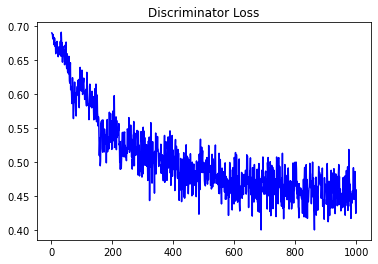

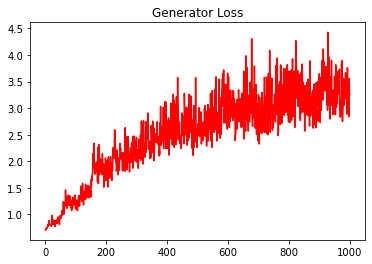

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.30054536045620256


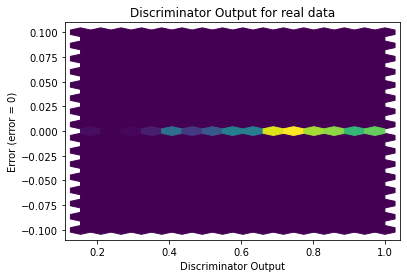

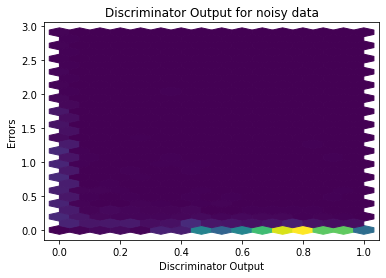

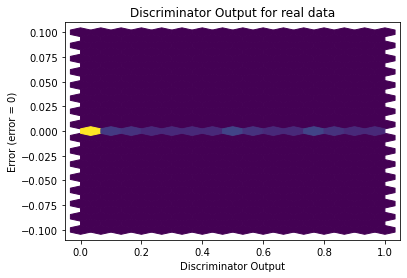

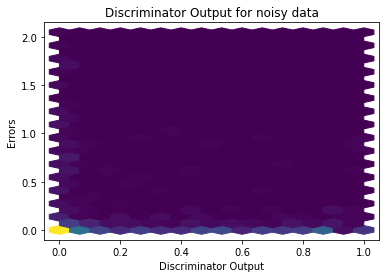

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())